In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
#to protect client's privacy,online sample UCI credit card data used for this demonstration instead

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [4]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df.rename(columns={'default.payment.next.month':'default_status'}, inplace=True)

In [22]:
df['sex1']=df['SEX'].map({1:'male', 2:'female'})
df['education1'] = df['EDUCATION'].map({1:'graduate school', 2:'university',3:'high school',
                                      4:'others'})
df['marriage1'] = df['MARRIAGE'].map({1:'married',2:'single',3:'others'})

In [18]:
from matplotlib.gridspec import GridSpec

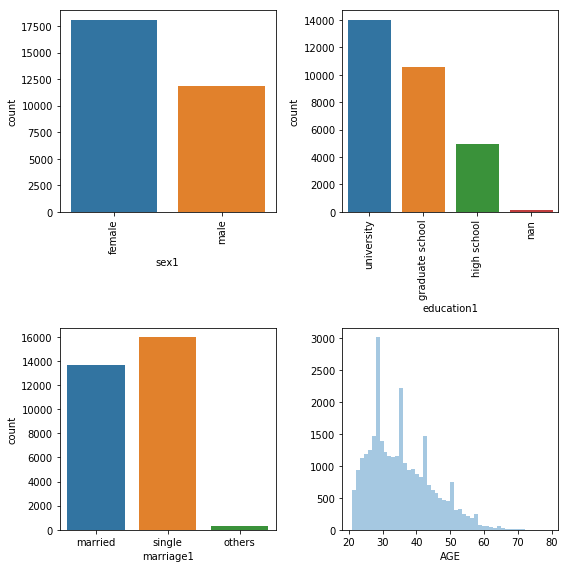

In [44]:
fig = plt.figure(figsize=(8,8))
gd = GridSpec(nrows=2,ncols=2)

ax0 = fig.add_subplot(gd[0,0])
sb.countplot(df['sex1'], ax=ax0)
ax0.set_xticklabels(labels=df['sex1'].unique() , rotation=90)

ax1 = fig.add_subplot(gd[0,1])
sb.countplot(df['education1'], ax=ax1)
ax1.set_xticklabels(labels=df['education1'].unique() , rotation=90)

ax2 =fig.add_subplot(gd[1,0])
sb.countplot(df['marriage1'], ax=ax2)

ax3 = fig.add_subplot(gd[1,1])
sb.distplot(df['AGE'],kde=False, ax=ax3)

fig.tight_layout()
plt.show()


In [46]:
#set PAY variables<0, all to zero
pay_list =['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for p in pay_list:
    df[p]= df[p].apply(lambda x:0 if x<1 else x)

In [50]:
df_cat = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','SEX','EDUCATION','MARRIAGE']]

In [51]:
#dummy variables creation
df_cat_enc =  pd.get_dummies(df_cat, drop_first=True)

In [52]:
df_num = df[['AGE','LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
             'PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

In [54]:
X = pd.concat([df_num_scaled,df_cat_enc], axis=1)

In [55]:
y =df['default_status']

In [58]:
df['default_status'].value_counts()

0    23364
1     6636
Name: default_status, dtype: int64

In [ ]:
#target is unbalanced, target stratification or upsampling/downsampling are need be be performed

In [56]:
#result df
result_df = pd.DataFrame(index=['LogReg','RF','XGB'], columns=['accuracy','precision', 'recall'])

In [76]:
#confusion matrix
def CMatrix(CM):
    dfcon = pd.DataFrame(data=CM,index=['pay','default'], columns=['pay','default'])
    dfcon.index.name ='true'
    dfcon.columns.name='Prediction'
    dfcon.loc['Total'] = dfcon.sum()
    dfcon['Total'] = dfcon.sum(axis=1)
    return dfcon

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify =y)

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, confusion_matrix

#### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)

result_df.loc['LogReg','accuracy']  = accuracy_score(y_test,pred1)
result_df.loc['LogReg','precision']= precision_score(y_test,pred1)
result_df.loc['LogReg','recall']=recall_score(y_test,pred1)

C:\Users\ERANDI DUNUMALAGE\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [77]:
CM1 = confusion_matrix(y_test,pred1)
CMatrix(CM1)

Prediction,pay,default,Total
true,,,
pay,5622,219,5841
default,1083,576,1659
Total,6705,795,7500


#### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)

result_df.loc['RF','accuracy']  = accuracy_score(y_test,pred2)
result_df.loc['RF','precision']= precision_score(y_test,pred2)
result_df.loc['RF','recall']=recall_score(y_test,pred2)

C:\Users\ERANDI DUNUMALAGE\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [78]:
CM2 = confusion_matrix(y_test,pred2)
CMatrix(CM2)

Prediction,pay,default,Total
true,,,
pay,5523,318,5841
default,1104,555,1659
Total,6627,873,7500


#### XGBoost

In [65]:
import xgboost as xgb

model3 = xgb.XGBClassifier(objective='binary:logistic',n_estimators=10)
model3.fit(X_train,y_train)
pred3 = model3.predict(X_test)

result_df.loc['XGB','accuracy']  = accuracy_score(y_test,pred3)
result_df.loc['XGB','precision']= precision_score(y_test,pred3)
result_df.loc['XGB','recall']=recall_score(y_test,pred3)

In [79]:
CM3 = confusion_matrix(y_test,pred3)
CMatrix(CM3)

Prediction,pay,default,Total
true,,,
pay,5605,236,5841
default,1072,587,1659
Total,6677,823,7500


In [66]:
result_df 

,accuracy,precision,recall
LogReg,0.8264,0.724528,0.347197
RF,0.8104,0.635739,0.334539
XGB,0.8256,0.713244,0.353828


In [2]:
#since target is unbalnced precision or recall should be optimized instead of accuracy

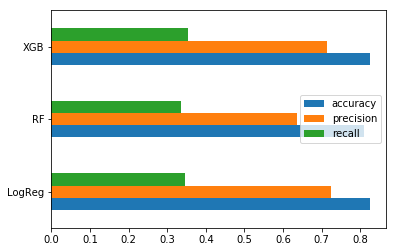

In [89]:
result_df.plot(kind='barh')

In [90]:
precision_lr, recall_lr, threshold_lr = precision_recall_curve(y_true=y_test,
                                        probas_pred=model1.predict_proba(X_test)[:,1])
precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_true=y_test,
                                        probas_pred=model2.predict_proba(X_test)[:,1])
precision_xgb, recall_xgb, threshold_xgb = precision_recall_curve(y_true=y_test,
                                        probas_pred=model3.predict_proba(X_test)[:,1])

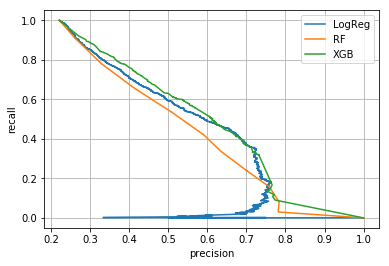

In [93]:
plt.plot(precision_lr,recall_lr, label='LogReg')
plt.plot(precision_rf, recall_rf, label='RF')
plt.plot(precision_xgb, recall_xgb, label='XGB')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.legend()
plt.show()


In [1]:
#out of fitted 3 models XGB gives highest recall against precision; so continue XGB model

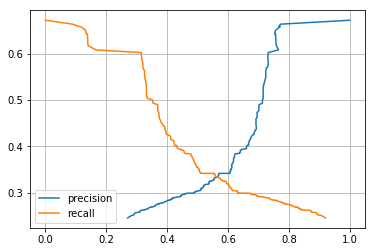

In [97]:
#XGB precision recall curves
plt.plot(precision_xgb[1:] ,threshold_xgb, label='precision')
plt.plot(recall_xgb[1:], threshold_xgb, label='recall')

plt.legend()
plt.grid()

In [99]:
predp = model3.predict_proba(X_test)[:,1]

In [3]:
#to achieve optimum precision and recall threshold can be selected as 0.45

In [101]:
predf = (predp>0.45).astype(int)

In [104]:
accuracy_score(y_test,predf)

0.826

In [105]:
precision_score(y_test,predf)

0.6919739696312365

In [106]:
recall_score(y_test,predf)

0.3845690174804099

In [107]:
CMf=confusion_matrix(y_test,predf)
CMatrix(CMf)

Prediction,pay,default,Total
true,,,
pay,5557,284,5841
default,1021,638,1659
Total,6578,922,7500


#### Hyper-parameter tunning

In [108]:
from sklearn.model_selection import GridSearchCV

In [111]:
#RF model
param_grid = {'max_depth':[2,5,10],
             'max_features':[2,3,5]}

In [113]:
grid_search = GridSearchCV(estimator=model2,
    param_grid=param_grid,
    scoring='recall',
    n_jobs=-1,
    verbose=0,)

In [114]:
grid_search.fit(X_train,y_train)

C:\Users\ERANDI DUNUMALAGE\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [115]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 5}

In [117]:
predGSCV1 = grid_search.best_estimator_.predict(X_test)

In [120]:
accuracy_score(y_test,predGSCV1)

0.8229333333333333

In [121]:
recall_score(y_test,predGSCV1)

0.3616636528028933

#### XGB variable importance

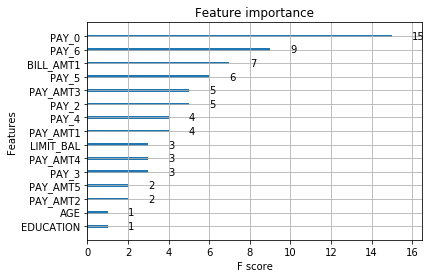

In [122]:
xgb.plot_importance(model3)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
fpr, tpr, threshold = roc_curve(y_true=y_test,
                                        y_score=model1.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_true=y_test,
                                        y_score=model1.predict_proba(X_test)[:,1])

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

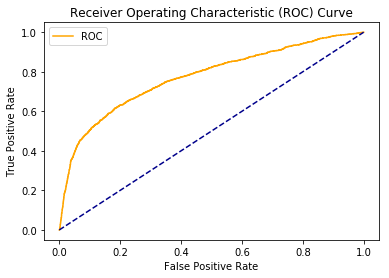

In [134]:
plot_roc_curve(fpr, tpr)

In [136]:
roc_auc

0.7728423888046287